<a href="https://colab.research.google.com/github/AdicherlaVenkataSai/GooglecrashML/blob/master/6.%20Validation_and_Test_Sets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
train = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

In [0]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [0]:

# Scale the training set's label.
train["median_house_value"] /= 1000.0

# Scale the test set's label
test["median_house_value"] /= 1000.0

In [13]:
#title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model               


def train_model(model, df, feature, label, my_epochs, 
                my_batch_size=None, my_validation_split=0.1):
  """Feed a dataset into the model in order to train it."""

  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=my_batch_size,
                      epochs=my_epochs,
                      validation_split=my_validation_split)

  # Gather the model's trained weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Isolate the root mean squared error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse, history.history   

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


In [14]:
#title Define the plotting function

def plot_the_loss_curve(epochs, mae_training, mae_validation):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()
  
  # We're not going to plot the first epoch, since the loss on the first epoch
  # is often substantially greater than the loss for other epochs.
  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)
   
  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


## Task 1: Experiment with the validation split

In the following code cell, you'll see a variable named `validation_split`, which we've initialized at 0.2.  The `validation_split` variable specifies the proportion of the original training set that will serve as the validation set. The original training set contains 17,000 examples. Therefore, a `validation_split` of 0.2 means that:

* 17,000 * 0.2 ~= 3,400 examples will become the validation set.
* 17,000 * 0.8 ~= 13,600 examples will become the new training set.

The following code builds a model, trains it on the training set, and evaluates the built model on both:

* The training set.
* And the validation set.

If the data in the training set is similar to the data in the validation set, then the two loss curves and the final loss values should be almost identical. However, the loss curves and final loss values are **not** almost identical. Hmm, that's odd.  

Experiment with two or three different values of `validation_split`.  Do different values of `validation_split` fix the problem? 


Epoch 1/30
136/136 [==============================] - 0s 2ms/step - loss: 41259.4570 - root_mean_squared_error: 203.1242 - val_loss: 50026.6602 - val_root_mean_squared_error: 223.6664
Epoch 2/30
136/136 [==============================] - 0s 1ms/step - loss: 23998.4844 - root_mean_squared_error: 154.9144 - val_loss: 29503.7734 - val_root_mean_squared_error: 171.7666
Epoch 3/30
136/136 [==============================] - 0s 1ms/step - loss: 12686.0752 - root_mean_squared_error: 112.6325 - val_loss: 16016.6855 - val_root_mean_squared_error: 126.5571
Epoch 4/30
136/136 [==============================] - 0s 1ms/step - loss: 7446.2422 - root_mean_squared_error: 86.2916 - val_loss: 9809.9355 - val_root_mean_squared_error: 99.0451
Epoch 5/30
136/136 [==============================] - 0s 1ms/step - loss: 6516.9766 - root_mean_squared_error: 80.7278 - val_loss: 9352.9609 - val_root_mean_squared_error: 96.7107
Epoch 6/30
136/136 [==============================] - 0s 1ms/step - loss: 6514.0889 - ro

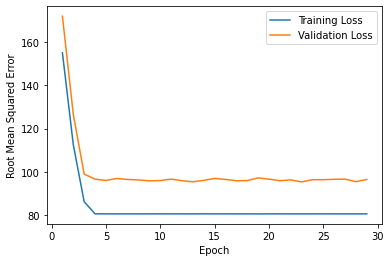

KeyError: ignored

In [15]:
#hyperparameters
learning_rate = 0.08
epochs = 30
batch_size  = 100

validation_splt = 0.2

feature = "medain_income"
label = "medain_house_value"


model = None# The following variables are the hyperparameters.
learning_rate = 0.08
epochs = 30
batch_size = 100

# Split the original training set into a reduced training set and a
# validation set. 
validation_split=0.2

# Identify the feature and the label.
my_feature="median_income"  # the median income on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on the neighborhood's median income.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions to build and train the model.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

model = build_model(learning_rate)
epochs, rmse, history = train_model(model, train, feature, label,
                                    epochs, batch_size, validation_splt)

loss_curve_plot(epochs, history['root_mean_squared_error'], 
                history['val_root_mean_squared_error'])



## Task 2: Determine **why** the loss curves differ

No matter how you split the training set and the validation set, the loss curves differ significantly. Evidently, the data in the training set isn't similar enough to the data in the validation set. Counterintuitive? Yes, but this problem is actually pretty common in machine learning. 

Your task is to determine **why** the loss curves aren't highly similar. As with most issues in machine learning, the problem is rooted in the data itself. To solve this mystery of why the training set and validation set aren't almost identical, write a line or two of [pandas code](https://colab.research.google.com/github/google/eng-edu/blob/master/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb?utm_source=validation-colab&utm_medium=colab&utm_campaign=colab-external&utm_content=pandas_tf2-colab&hl=en) in the following code cell.  Here are a couple of hints:

  * The previous code cell split the original training set into:
    * a reduced training set (the original training set - the validation set)
    * the validation set 
  * By default, the pandas [`head`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) method outputs the *first* 5 rows of the DataFrame. To see more of the training set, specify the `n` argument to `head` and assign a large positive integer to `n`.

In [17]:
#title Double-click for a possible solution to Task 2.

# Examine examples 0 through 4 and examples 25 through 29
# of the training set
train.head(n=1000)

# The original training set is sorted by longitude. 
# Apparently, longitude influences the relationship of
# total_rooms to median_house_value.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66.9
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80.1
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85.7
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73.4
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65.5
...,...,...,...,...,...,...,...,...,...
995,-117.09,32.55,8.0,6533.0,1217.0,4797.0,1177.0,3.9583,144.4
996,-117.10,34.57,6.0,5110.0,1044.0,1938.0,724.0,3.1917,112.8
997,-117.10,34.21,22.0,4397.0,931.0,1145.0,445.0,4.5268,108.4
998,-117.10,34.03,24.0,4144.0,826.0,2127.0,772.0,2.5172,96.0


## Task 3. Fix the problem

To fix the problem, shuffle the examples in the training set before splitting the examples into a training set and validation set. To do so, take the following steps:

1. Shuffle the data in the training set by adding the following line anywhere before you call `train_model` (in the code cell associated with Task 1):

```
  shuffled_train_df = train_df.reindex(np.random.permutation(train_df.index))
```                                    

2. Pass `shuffled_train_df` (instead of `train_df`) as the second argument to `train_model` (in the code call associated with Task 1) so that the call becomes as follows:

```
  epochs, rmse, history = train_model(my_model, shuffled_train_df, my_feature, 
                                      my_label, epochs, batch_size, 
                                      validation_split)
```

Epoch 1/70
136/136 [==============================] - 0s 2ms/step - loss: 45249.3711 - root_mean_squared_error: 212.7190 - val_loss: 34246.5039 - val_root_mean_squared_error: 185.0581
Epoch 2/70
136/136 [==============================] - 0s 1ms/step - loss: 26712.6367 - root_mean_squared_error: 163.4400 - val_loss: 18811.8359 - val_root_mean_squared_error: 137.1562
Epoch 3/70
136/136 [==============================] - 0s 1ms/step - loss: 14489.4531 - root_mean_squared_error: 120.3721 - val_loss: 9814.1553 - val_root_mean_squared_error: 99.0664
Epoch 4/70
136/136 [==============================] - 0s 1ms/step - loss: 8357.6699 - root_mean_squared_error: 91.4203 - val_loss: 6824.4243 - val_root_mean_squared_error: 82.6101
Epoch 5/70
136/136 [==============================] - 0s 1ms/step - loss: 7082.7251 - root_mean_squared_error: 84.1589 - val_loss: 6800.7896 - val_root_mean_squared_error: 82.4669
Epoch 6/70
136/136 [==============================] - 0s 1ms/step - loss: 7070.3926 - root

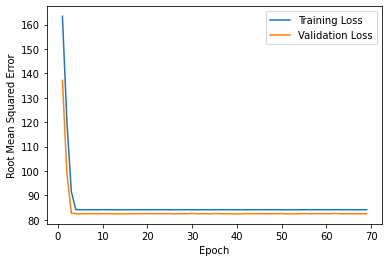

In [19]:

#hyperparameter

learning_rate = 0.08
epochs = 70
batch_size = 100

validation_split = 0.2

# Identify the feature and the label.
my_feature="median_income"  # the median income on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on the neighborhood's median income.  

# Discard any pre-existing version of the model.
my_model = None

#shuffle the examples
shuffled_train = train.reindex(np.random.permutation(train.index))

my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, shuffled_train, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])




Experiment with `validation_split` to answer the following questions:

* With the training set shuffled, is the final loss for the training set closer to the final loss for the validation set?  
* At what range of values of `validation_split` do the final loss values for the training set and validation set diverge meaningfully?  Why?


sol :
```
Yes, after shuffling the original training set, the final loss for the training set and the validation set become much closer

If the val split < 0.15, the final loss values or the training set and val set diverge meaningfully. Apparently the val set no longer contains enough examples
```


## Task 4: Use the Test Dataset to Evaluate Your Model's Performance

The test set usually acts as the ultimate judge of a model's quality. The test set can serve as an impartial judge because its examples haven't been used in training the model. Run the following code cell to evaluate the model with the test set:

In [21]:
x_test = test[my_feature]
y_test = test[my_label]

results = my_model.evaluate(x_test, y_test, batch_size=batch_size)

30/30 [==============================] - 0s 1ms/step - loss: 7009.9893 - root_mean_squared_error: 83.7257


Compare the root mean squared error of the model when evaluated on each of the three datasets:

* training set: look for `root_mean_squared_error` in the final training epoch.
* validation set: look for `val_root_mean_squared_error` in the final training epoch.
* test set: run the preceding code cell and examine the `root_mean_squred_error`.

Ideally, the root mean squared error of all three sets should be similar. Are they?

sol:
```
In this experiment the rmse values were similar enough
```